### Plotting NAO data ###

Plotting the NAO for the processed raw and alt_lagged data for the different forecast ranges and different summer and winter NAO.

In [1]:
# Import relevant libraries
import os
import sys
import glob
import re

# Third-party libraries
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
# Import local modules
import functions as func
import nao_skill_functions as nao_func
import nao_alt_lag_functions as nao_lag_func

# Import dictionaries
sys.path.append('/home/users/benhutch/skill-maps')
import dictionaries as dicts

# Import the functions from the rose-suite-matching repository
sys.path.append('/home/users/benhutch/skill-maps/rose-suite-matching')
import nao_matching_seasons as nms_func

In [3]:
# Set up the variables
season = "DJFM"
forecast_range = "2-9"
start_year = 1961
end_year = 2014
lag = 4
alt_lag = True

In [4]:
# Load the raw data for this variable
raw_psl = nao_lag_func.load_data(season=season,
                                  forecast_range=forecast_range,
                                  start_year=start_year,
                                  end_year=end_year,
                                  lag=lag,
                                  alt_lag=alt_lag,)

AssertionError: No files found for psl_DJFM_global_1964_2014_2-9_4_*alternate_lag.npy

### Data dimensions ###

In the case of the raw data, the dimensions will be something like:

(54, 178, 9, 72, 144)

* 54 is the number of time steps (e.g. from 1961 to 2014)
* 178 is the number of ensemble members (e.g. from the full CMIP6 ensemble)
* 9 is the number of forecast years (e.g. for s1960, from 1960 to 1970)
* 72 is the number of latitudes (2.5 degree grid spacing)
* 144 is the number of longitudes (2.5 degree grid spacing)

In the case of the alternative lagged (/lagged) data, the dimensions will be something like:

(51, 712, 72, 144)

* 51 is the number of time steps (e.g. from 1964 to 2014)
* 712 is the number of lagged ensemble members (e.g. from the full lagged CMIP6 ensemble)
* 72 is the number of latitudes (2.5 degree grid spacing)
* 144 is the number of longitudes (2.5 degree grid spacing)

In [5]:
# import importlib
import importlib

# Import the function again so as not to have to restart the kernel
importlib.reload(sys.modules['nao_alt_lag_functions'])

# import the functions
from nao_alt_lag_functions import *

In [6]:
# Test the other new function
nao_stats = nao_lag_func.calc_nao_stats(data=raw_psl,
                                        season=season,
                                        forecast_range=forecast_range,
                                        start_year=start_year,
                                        end_year=end_year,
                                        lag=lag,
                                        alt_lag=alt_lag,
                                        )

Using standard NAO definition
Forecast range obs: 2-5


/home/users/benhutch/.local/lib/python3.10/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'time', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'time'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Time dimension of obs: ['1960-12-31T00:00:00.000000000' '1961-12-31T00:00:00.000000000'
 '1962-12-31T00:00:00.000000000' '1963-12-31T00:00:00.000000000'
 '1964-12-31T00:00:00.000000000' '1965-12-31T00:00:00.000000000'
 '1966-12-31T00:00:00.000000000' '1967-12-31T00:00:00.000000000'
 '1968-12-31T00:00:00.000000000' '1969-12-31T00:00:00.000000000'
 '1970-12-31T00:00:00.000000000' '1971-12-31T00:00:00.000000000'
 '1972-12-31T00:00:00.000000000' '1973-12-31T00:00:00.000000000'
 '1974-12-31T00:00:00.000000000' '1975-12-31T00:00:00.000000000'
 '1976-12-31T00:00:00.000000000' '1977-12-31T00:00:00.000000000'
 '1978-12-31T00:00:00.000000000' '1979-12-31T00:00:00.000000000'
 '1980-12-31T00:00:00.000000000' '1981-12-31T00:00:00.000000000'
 '1982-12-31T00:00:00.000000000' '1983-12-31T00:00:00.000000000'
 '1984-12-31T00:00:00.000000000' '1985-12-31T00:00:00.000000000'
 '1986-12-31T00:00:00.000000000' '1987-12-31T00:00:00.000000000'
 '1988-12-31T00:00:00.000000000' '1989-12-31T00:00:00.000000000'
 '

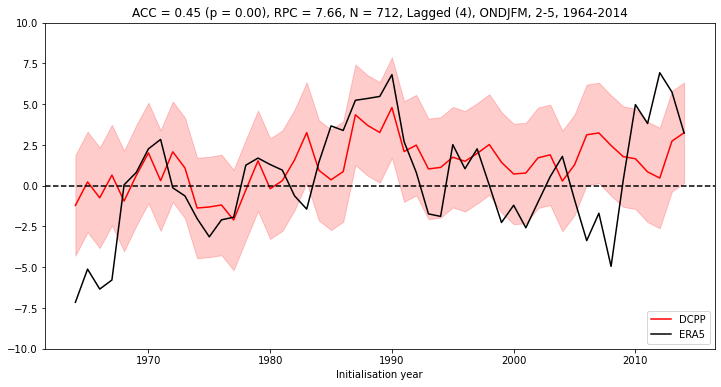

In [7]:
# Plot the NAO
nao_lag_func.plot_nao(nao_stats=nao_stats,
                      season=season,
                      forecast_range=forecast_range,
                      lag=lag,
                      alt_lag=alt_lag,
                      figsize_x=12,
                      figsize_y=6,
                      )

In [8]:
# how could we break this down into individual models? - does depresys have second winter skill?
# do november init models have second winter skill?